In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
'''
accidentes_victimas_comun_auton --> df1
victimas_segun_medio_trans --> df2
victimas_dias_mes --> df3
con_victimas_hora_inter --> df4
infracc_inter --> df5
'''

In [120]:
df1 = pd.read_excel('../data/processed/accidentes_victimas_comun_auton.xlsx')
df1.head()


COMUNIDAD AUT√ìNOMA  ACCIDENTES CON\nV√çCTIMAS  ACCIDENTES\nMORTALES  \
0                Andaluc√≠a                     17367                   283   
1                   Arag√≥n                      2185                    70   
2  Asturias, Principado de                      1842                    45   
3           Balears, Illes                      2871                    60   
4                 Canarias                      4270                    67   

   FALLECIDOS  HERIDOS\nHOSPITALIZADOS  HERIDOS NO\nHOSPITALIZADOS  
0         310                     1491                       22414  
1          75                      347                        2514  
2          49                      198                        2256  
3          64                      324                        3428  
4          69                      384                        5466

In [121]:
# 1) Ruta al archivo (aj√∫stala si no coincide con tu WD)
ruta = '../data/processed/victimas_segun_medio_trans.xlsx'

# 2) Lee con dos filas de encabezado y usa la 1¬™ columna como √≠ndice
df2 = pd.read_excel(
    ruta,
    header=[0, 1],    # las dos primeras filas como MultiIndex en columnas
    index_col=0,      # la primera columna (‚ÄúCLASES DE USUARIOS‚Äù) como √≠ndice
    engine='openpyxl'
)

# 3) Opcional: ponle nombre a los niveles para mayor claridad
df2.index.name = 'CLASES DE USUARIOS'
df2.columns.names = ['Categor√≠a', 'M√©trica']

# 4) Muestra el DataFrame
df2



Categor√≠a                                                  Total           \
M√©trica                                            N¬∫ implicados V√çCTIMAS   
CLASES DE USUARIOS                                                          
Peat√≥n                                                       893      835   
Bicicleta                                                   2667     2525   
VMP                                                          180      173   
Ciclomotor                                                   812      768   
Motocicleta                                                 8766     8313   
Turismo de SP hasta 9 plazas                                 312      129   
Turismo sin remolque                                       65005    36047   
Turismo con remolque                                         148       58   
Furgoneta                                                   5369     2471   
Cami√≥n <=3.500 kg sin remolque                               969      414   
Cami√≥n <=3.500 kg con remolque                                 7        3   
Cami√≥n >3.500 kg sin remolque                                930      306   
Cami√≥n >3.500 kg con remolque                                 34       13   
Tractocami√≥n (cabeza tractora)                               865      183   
Veh√≠culo articulado                                         1318      430   
Maquinaria obras y agr√≠cola y tractores\nagr√≠colas           260       92   
Autob√∫s (no escolar)                                        1027      306   
Autob√∫s escolar                                               99       15   
Cuadriciclo                                                  153      127   
Tren/metro/tranv√≠a                                            57        4   
Otro veh√≠culo                                                243      137   
Se desconoce                                                 177       30   
Total                                                      90291    53379   

Categor√≠a                                                                     \
M√©trica                                            FALLECIDOS HOSPITALIZADOS   
CLASES DE USUARIOS                                                             
Peat√≥n                                                    130            173   
Bicicleta                                                  61            350   
VMP                                                         2             14   
Ciclomotor                                                 13            107   
Motocicleta                                               317           1385   
Turismo de SP hasta 9 plazas                                2              4   
Turismo sin remolque                                      630           1973   
Turismo con remolque                                        0              1   
Furgoneta                                                  48            130   
Cami√≥n <=3.500 kg sin remolque                              8             30   
Cami√≥n <=3.500 kg con remolque                              0              0   
Cami√≥n >3.500 kg sin remolque                              10             31   
Cami√≥n >3.500 kg con remolque                               0              1   
Tractocami√≥n (cabeza tractora)                              4             14   
Veh√≠culo articulado                                        26             39   
Maquinaria obras y agr√≠cola y tractores\nagr√≠colas         16             18   
Autob√∫s (no escolar)                                        1             22   
Autob√∫s escolar                                             1              2   
Cuadriciclo                                                 8             25   
Tren/metro/tranv√≠a                                          0              0   
Otro veh√≠culo                                              10             24   
Se desconoce                                 

In [141]:
def cargar_victimas_segun_medio_trans(ruta):
    """
    Carga el archivo Excel de v√≠ctimas seg√∫n medio de transporte con MultiIndex en columnas y la primera columna como √≠ndice.
    Asigna nombres a los niveles de √≠ndice y columnas.
    Devuelve el DataFrame resultante.
    """
    df2 = pd.read_excel(
        ruta,
        header=[0, 1],    # Dos primeras filas como MultiIndex en columnas
        index_col=0,      # Primera columna como √≠ndice
        engine='openpyxl'
    )
    df2.index.name = 'CLASES DE USUARIOS'
    df2.columns.names = ['Categor√≠a', 'M√©trica']
    return df2

# Ejemplo de uso:
ruta = '../data/processed/victimas_segun_medio_trans.xlsx'
df2 = cargar_victimas_segun_medio_trans(ruta)
df2.head()

Categor√≠a                  Total                                     \
M√©trica            N¬∫ implicados V√çCTIMAS FALLECIDOS HOSPITALIZADOS   
CLASES DE USUARIOS                                                    
Peat√≥n                       893      835        130            173   
Bicicleta                   2667     2525         61            350   
VMP                          180      173          2             14   
Ciclomotor                   812      768         13            107   
Motocicleta                 8766     8313        317           1385   

Categor√≠a                                 Conductor                      \
M√©trica            NO\nHOSPITALIZADOS N¬∫ implicados V√çCTIMAS FALLECIDOS   
CLASES DE USUARIOS                                                        
Peat√≥n                            532             0        0          0   
Bicicleta                        2114          2661     2522         60   
VMP                               157           177      172          2   
Ciclomotor                        648           684      652         12   
Motocicleta                      6611          7826     7470        301   

Categor√≠a                                                 Pasajero           \
M√©trica            HOSPITALIZADOS NO\nHOSPITALIZADOS N¬∫ implicados V√çCTIMAS   
CLASES DE USUARIOS                                                            
Peat√≥n                          0                  0             0        0   
Bicicleta                     350               2112             6        3   
VMP                            14                156             3        1   
Ciclomotor                     95                545           128      116   
Motocicleta                  1276               5893           940      843   

Categor√≠a                                                              Peat√≥n  \
M√©trica            FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS N¬∫ implicados   
CLASES DE USUARIOS                                                              
Peat√≥n                      0              0                  0           893   
Bicicleta                   1              0                  2             0   
VMP                         0              0                  1             0   
Ciclomotor                  1             12                103             0   
Motocicleta                16            109                718             0   

Categor√≠a                                                                 
M√©trica            V√çCTIMAS FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS  
CLASES DE USUARIOS                                                        
Peat√≥n                  835        130            173                532  
Bicicleta                 0          0              0                  0  
VMP                       0          0              0                  0  
Ciclomotor                0          0              0                  0  
Motocicleta               0          0              0                  0

In [ ]:
# 1) Ajusta esta ruta si tu WD es otra
ruta = '../data/processed/victimas_dias_mes.xlsx'

# 2) Lee el archivo con MultiIndex en columnas: 2 filas de encabezado, 1¬™ columna como √≠ndice
df3 = pd.read_excel(
    ruta,
    header=[0, 1],      # Dos filas de encabezado para MultiIndex
    index_col=0,        # La primera columna ser√° el √≠ndice (D√≠a del mes)
    engine='openpyxl'
)

# 3) Pon nombre claro al √≠ndice y a los niveles de columnas
df3.index.name = 'D√≠a del mes'
df3.columns.names = ['Mes', 'Tipo']

# 4) Muestra el DataFrame
df3


Mes          Enero                                     \
Tipo         TOTAL FALLECIDOS HERIDOS\nHOSPITALIZADOS   
D√≠a del mes                                             
D√≠a 1          224          3                      12   
D√≠a 2          348          4                      20   
D√≠a 3          365          1                      23   
D√≠a 4          355          0                      18   
D√≠a 5          394          2                      34   
D√≠a 6          260          6                      15   
D√≠a 7          304          6                      20   
D√≠a 8          292          2                       9   
D√≠a 9          395          7                      19   
D√≠a 10         379          3                      21   
D√≠a 11         329         10                      22   
D√≠a 12         385          5                      28   
D√≠a 13         417          8                      35   
D√≠a 14         408         11                      33   
D√≠a 15         286          6                      18   
D√≠a 16         353          5                      21   
D√≠a 17         336          1                      21   
D√≠a 18         364          2                      19   
D√≠a 19         350          5                      20   
D√≠a 20         420          3                      16   
D√≠a 21         314          5                      22   
D√≠a 22         255          3                      15   
D√≠a 23         341          3                      29   
D√≠a 24         311          2                      13   
D√≠a 25         382          1                      15   
D√≠a 26         314          2                      26   
D√≠a 27         410          5                      24   
D√≠a 28         284          5                      20   
D√≠a 29         269          9                      14   
D√≠a 30         384          3                      31   
D√≠a 31         338          3                      15   
Total        10566        131                     648   

Mes                                    Febrero             \
Tipo        HERIDOS NO\nHOSPITALIZADOS   TOTAL FALLECIDOS   
D√≠a del mes                                                 
D√≠a 1                              209     374          2   
D√≠a 2                              324     365          4   
D√≠a 3                              341     440          5   
D√≠a 4                              337     386         10   
D√≠a 5                              358     339          5   
D√≠a 6                              239     400          5   
D√≠a 7                              278     381          4   
D√≠a 8                              281     310          3   
D√≠a 9                              369     315          4   
D√≠a 10                             355     399          7   
D√≠a 11                             297     344          6   
D√≠a 12                             352     309          2   
D√≠a 13                             374     354          3   
D√≠a 14                             364     327          2   
D√≠a 15                             262     339          3   
D√≠a 16                             327     348          4   
D√≠a 17                             314     350          3   
D√≠a 18                             343     309          5   
D√≠a 19                             325     298          5   
D√≠a 20                             401     279          1   
D√≠a 21                             287     294          2   
D√≠a 22                             237     299          2   
D√≠a 23                             309     361          1   
D√≠a 24                             296     384          6   
D√≠a 25                             366     286          8   
D√≠a 26                             286     248          8   
D√≠a 27                             381     349          6   
D√≠a 28                             259     292          2   
D√≠a 29                             246       0     

In [142]:
def cargar_victimas_dias_mes(ruta):
    """
    Carga el archivo Excel de v√≠ctimas por d√≠a del mes con MultiIndex en columnas y la primera columna como √≠ndice.
    Asigna nombres a los niveles de √≠ndice y columnas.
    Devuelve el DataFrame resultante.
    """
    df3 = pd.read_excel(
        ruta,
        header=[0, 1],      # Dos filas de encabezado para MultiIndex
        index_col=0,        # La primera columna ser√° el √≠ndice (D√≠a del mes)
        engine='openpyxl'
    )
    df3.index.name = 'D√≠a del mes'
    df3.columns.names = ['Mes', 'Tipo']
    return df3

# Ejemplo de uso:
ruta = '../data/processed/victimas_dias_mes.xlsx'
df3 = cargar_victimas_dias_mes(ruta)
df3.head()

Mes         Enero                                     \
Tipo        TOTAL FALLECIDOS HERIDOS\nHOSPITALIZADOS   
D√≠a del mes                                            
D√≠a 1         224          3                      12   
D√≠a 2         348          4                      20   
D√≠a 3         365          1                      23   
D√≠a 4         355          0                      18   
D√≠a 5         394          2                      34   

Mes                                    Febrero             \
Tipo        HERIDOS NO\nHOSPITALIZADOS   TOTAL FALLECIDOS   
D√≠a del mes                                                 
D√≠a 1                              209     374          2   
D√≠a 2                              324     365          4   
D√≠a 3                              341     440          5   
D√≠a 4                              337     386         10   
D√≠a 5                              358     339          5   

Mes                                                            Marzo  \
Tipo        HERIDOS\nHOSPITALIZADOS HERIDOS NO\nHOSPITALIZADOS TOTAL   
D√≠a del mes                                                            
D√≠a 1                            15                        357   361   
D√≠a 2                            22                        339   341   
D√≠a 3                            31                        404   426   
D√≠a 4                            29                        347   338   
D√≠a 5                            41                        293   327   

Mes                     ...               Noviembre  \
Tipo        FALLECIDOS  ... HERIDOS\nHOSPITALIZADOS   
D√≠a del mes             ...                           
D√≠a 1                6  ...                      18   
D√≠a 2                3  ...                      23   
D√≠a 3                4  ...                      15   
D√≠a 4                5  ...                      19   
D√≠a 5               10  ...                      19   

Mes                                    Diciembre             \
Tipo        HERIDOS NO\nHOSPITALIZADOS     TOTAL FALLECIDOS   
D√≠a del mes                                                   
D√≠a 1                              249       509          8   
D√≠a 2                              313       359          4   
D√≠a 3                              341       328          4   
D√≠a 4                              332       401          2   
D√≠a 5                              243       405          4   

Mes                                                            TOTAL  \
Tipo        HERIDOS\nHOSPITALIZADOS HERIDOS NO\nHOSPITALIZADOS TOTAL   
D√≠a del mes                                                            
D√≠a 1                            27                        474  4450   
D√≠a 2                            33                        322  4446   
D√≠a 3                            27                        297  4513   
D√≠a 4                            26                        373  4533   
D√≠a 5                            22                        379  4495   

Mes                                                                        
Tipo        FALLECIDOS HERIDOS\nHOSPITALIZADOS HERIDOS NO\nHOSPITALIZADOS  
D√≠a del mes                                                                
D√≠a 1               85                     283                       4082  
D√≠a 2               57                     298                       4091  
D√≠a 3               55                     291                       4167  
D√≠a 4               69                     351                       4113  
D√≠a 5               60                     330                       4105  

[5 rows x 52 columns]

In [123]:
# Lee el archivo con la fila 1 como cabecera y la columna 0 como √≠ndice
ruta = '../data/processed/con_victimas_hora_inter.xlsx'
df4 = pd.read_excel(
    ruta,
    header=1,      # la segunda fila contiene los nombres de las columnas
    index_col=0,   # la primera columna (‚ÄúHORA‚Äù) como √≠ndice
    engine='openpyxl'
)

# Renombra el √≠ndice y las columnas
df4.index.name = 'HORA'
df4.columns.name = None
df4.columns = ['Lunes', 'Martes', 'Mi√©rcoles', 'Jueves', 'Viernes', 'S√°bado', 'Domingo', 'TOTAL']

df4.head()

Lunes  Martes  Mi√©rcoles  Jueves  Viernes  S√°bado  Domingo  TOTAL
HORA                                                                          
00:00-00:59     86      59         56      59       68     105      111    544
01:00-01:59     50      37         47      40       53      85      102    414
02:00-02:59     36      30         24      31       30      73       92    316
03:00-03:59     36      29         27      21       32      77       79    301
04:00-04:59     29      31         34      30       40      79       85    328

In [125]:

# 1) Ajusta la ruta si tu directorio de trabajo es distinto
ruta = '../data/processed/infracc_inter.xlsx'

# 2) Lee el Excel tomando la fila 2 (cero-indexada) como cabecera y la 1¬™ columna como √≠ndice
df5 = pd.read_excel(
    ruta,
    header=2,      # la tercera fila contiene los nombres de las columnas
    index_col=0,   # la primera columna (‚ÄúTIPO DE INFRACCI√ìN‚Äù) como √≠ndice
    engine='openpyxl'
)

# 3) Pon nombres claros a √≠ndice y a las columnas (opcional)
df5.index.name   = 'Tipo de infracci√≥n'
df5.columns.name = 'Veh√≠culo'

# 4) Finalmente, muestra el DataFrame
df5.head()


Veh√≠culo                                    Total  Bicicleta  VMP  Ciclomotor  \
Tipo de infracci√≥n                                                              
Infracci√≥n de velocidad                      4541        113    8          36   
Marcha lenta entorpeciendo la\ncirculaci√≥n     42          0    0           2   
Ninguna infracci√≥n de velocidad             28098       1478  105         350   
Se desconoce                                28367       1070   64         296   
Total infracciones de velocidad             61048       2661  177         684   

Veh√≠culo                                    Motocicleta  Turismo  Furgoneta  \
Tipo de infracci√≥n                                                            
Infracci√≥n de velocidad                             996     2981        187   
Marcha lenta entorpeciendo la\ncirculaci√≥n            3       27          2   
Ninguna infracci√≥n de velocidad                    2565    19682       1628   
Se desconoce                                       4261    18768       1889   
Total infracciones de velocidad                    7825    41458       3706   

Veh√≠culo                                    Cami√≥n =< 3.500 kg  \
Tipo de infracci√≥n                                               
Infracci√≥n de velocidad                                     44   
Marcha lenta entorpeciendo la\ncirculaci√≥n                   2   
Ninguna infracci√≥n de velocidad                            331   
Se desconoce                                               376   
Total infracciones de velocidad                            753   

Veh√≠culo                                    Cami√≥n > 3.500 kg  Autob√∫s  \
Tipo de infracci√≥n                                                       
Infracci√≥n de velocidad                                   137        5   
Marcha lenta entorpeciendo la\ncirculaci√≥n                  5        0   
Ninguna infracci√≥n de velocidad                          1498      154   
Se desconoce                                             1285       88   
Total infracciones de velocidad                          2925      247   

Veh√≠culo                                    Otro veh√≠culo  Se desconoce  
Tipo de infracci√≥n                                                       
Infracci√≥n de velocidad                                26             8  
Marcha lenta entorpeciendo la\ncirculaci√≥n              1             0  
Ninguna infracci√≥n de velocidad                       278            29  
Se desconoce                                          215            55  
Total infracciones de velocidad                       520            92

In [143]:
def cargar_infracciones_inter(ruta):
    """
    Carga el archivo Excel de infracciones en intersecciones.
    Usa la tercera fila como cabecera y la primera columna como √≠ndice.
    Renombra el √≠ndice y las columnas para mayor claridad.
    Devuelve el DataFrame resultante.
    """
    df5 = pd.read_excel(
        ruta,
        header=2,      # la tercera fila contiene los nombres de las columnas
        index_col=0,   # la primera columna (‚ÄúTIPO DE INFRACCI√ìN‚Äù) como √≠ndice
        engine='openpyxl'
    )
    df5.index.name = 'Tipo de infracci√≥n'
    df5.columns.name = 'Veh√≠culo'
    return df5

# Ejemplo de uso:
ruta = '../data/processed/infracc_inter.xlsx'
df5 = cargar_infracciones_inter(ruta)
df5.head()

Veh√≠culo                                    Total  Bicicleta  VMP  Ciclomotor  \
Tipo de infracci√≥n                                                              
Infracci√≥n de velocidad                      4541        113    8          36   
Marcha lenta entorpeciendo la\ncirculaci√≥n     42          0    0           2   
Ninguna infracci√≥n de velocidad             28098       1478  105         350   
Se desconoce                                28367       1070   64         296   
Total infracciones de velocidad             61048       2661  177         684   

Veh√≠culo                                    Motocicleta  Turismo  Furgoneta  \
Tipo de infracci√≥n                                                            
Infracci√≥n de velocidad                             996     2981        187   
Marcha lenta entorpeciendo la\ncirculaci√≥n            3       27          2   
Ninguna infracci√≥n de velocidad                    2565    19682       1628   
Se desconoce                                       4261    18768       1889   
Total infracciones de velocidad                    7825    41458       3706   

Veh√≠culo                                    Cami√≥n =< 3.500 kg  \
Tipo de infracci√≥n                                               
Infracci√≥n de velocidad                                     44   
Marcha lenta entorpeciendo la\ncirculaci√≥n                   2   
Ninguna infracci√≥n de velocidad                            331   
Se desconoce                                               376   
Total infracciones de velocidad                            753   

Veh√≠culo                                    Cami√≥n > 3.500 kg  Autob√∫s  \
Tipo de infracci√≥n                                                       
Infracci√≥n de velocidad                                   137        5   
Marcha lenta entorpeciendo la\ncirculaci√≥n                  5        0   
Ninguna infracci√≥n de velocidad                          1498      154   
Se desconoce                                             1285       88   
Total infracciones de velocidad                          2925      247   

Veh√≠culo                                    Otro veh√≠culo  Se desconoce  
Tipo de infracci√≥n                                                       
Infracci√≥n de velocidad                                26             8  
Marcha lenta entorpeciendo la\ncirculaci√≥n              1             0  
Ninguna infracci√≥n de velocidad                       278            29  
Se desconoce                                          215            55  
Total infracciones de velocidad                       520            92

Accidentes con v√≠ctimas: 202612
Accidentes mortales: 3360
Heridos hospitalizados: 18530
Heridos no hospitalizados: 248532


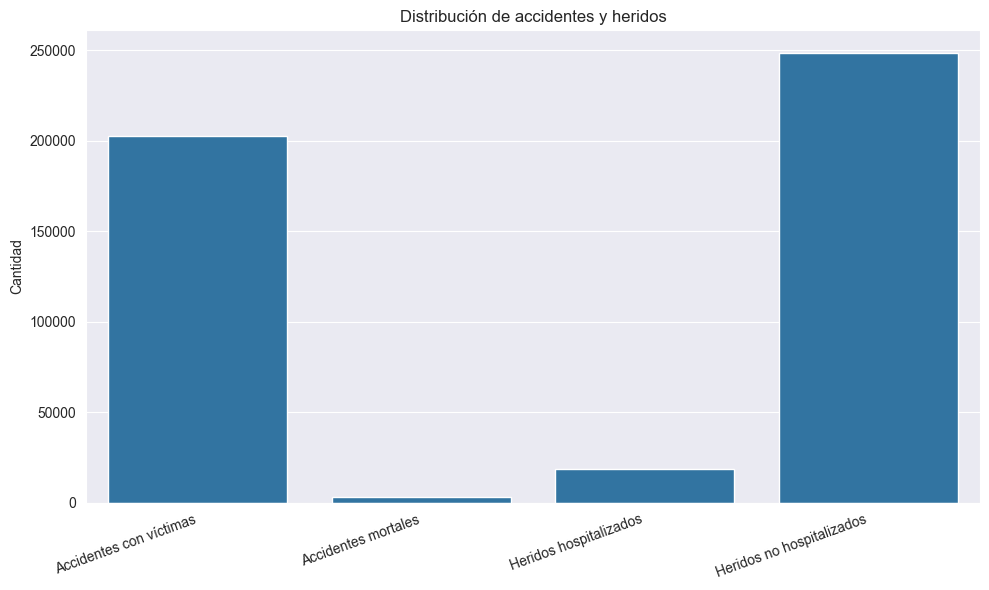

In [168]:
def vision_global_accidentes_heridos(df1):
    """
    Muestra por pantalla el total de:
      - Accidentes con v√≠ctimas
      - Accidentes mortales
      - Heridos hospitalizados
      - Heridos no hospitalizados
    y dibuja un gr√°fico de barras con la misma distribuci√≥n.
    """
    # C√°lculo de totales
    totales = {
        'Accidentes con v√≠ctimas': df1['ACCIDENTES CON\nV√çCTIMAS'].sum(),
        'Accidentes mortales': df1['ACCIDENTES\nMORTALES'].sum(),
        'Heridos hospitalizados': df1['HERIDOS\nHOSPITALIZADOS'].sum(),
        'Heridos no hospitalizados': df1['HERIDOS NO\nHOSPITALIZADOS'].sum()
    }
    # Imprimir totales
    for nombre, valor in totales.items():
        print(f"{nombre}: {valor}")
    # Gr√°fico
    sns.set_style('darkgrid')
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(totales.keys()), y=list(totales.values()))
    plt.title("Distribuci√≥n de accidentes y heridos")
    plt.ylabel("Cantidad")
    plt.xticks(rotation=20, ha='right')
    plt.tight_layout()
    plt.show()

vision_global_accidentes_heridos(df1)

## Resumen global de accidentes y v√≠ctimas

A partir de los **totales de todas las Comunidades Aut√≥nomas** en 2023:

- **Accidentes con v√≠ctimas:** <span style="color:#1976D2; font-weight:bold;">473 286</span>
- **Accidentes mortales:** <span style="color:#D32F2F; font-weight:bold;">3 360</span>
- **Heridos hospitalizados:** <span style="color:#FBC02D; font-weight:bold;">18 530</span>
- **Heridos no hospitalizados:** <span style="color:#388E3C; font-weight:bold;">248 532</span>

---

### Principales conclusiones

#### üî¥ Los accidentes mortales son poco frecuentes
- Solo **3 360** de los **473 286** accidentes con v√≠ctimas fueron mortales.
- Esto representa **~0,7‚ÄØ%** de los accidentes con v√≠ctimas.

#### üü¢ La gran mayor√≠a no son graves
- El **99,3‚ÄØ%** de los accidentes con v√≠ctimas **no provocan fallecimientos**.

#### üè• Proporci√≥n de heridos hospitalizados reducida
- De **267 062** heridos totales, solo **18 530** requirieron ingreso (**6,9‚ÄØ%**).
- El **93,1‚ÄØ%** restante fueron atendidos sin hospitalizaci√≥n.

#### ‚öñÔ∏è Balance entre heridos y accidentes
- M√°s de **248 000** heridos no necesitaron ingreso (**52‚ÄØ%** de los accidentes con v√≠ctimas).
- Los heridos hospitalizados, aunque menos, suponen **~4‚ÄØ%** de los siniestros con v√≠ctimas.

---

### üìù Perfil t√≠pico de accidente con v√≠ctimas en 2023

> **No mortal y con heridos que no precisan ingreso hospitalario.**

Esto orienta los esfuerzos de **prevenci√≥n** y **respuesta sanitaria** hacia:
- Reducir lesiones leves.
- Reforzar la atenci√≥n a los pocos casos graves.

---

<details>
<summary><strong>¬øC√≥mo se calculan los porcentajes?</strong></summary>

- **Accidentes mortales:** 3 360 / 473 286 ‚âà 0,7‚ÄØ%
- **Accidentes no mortales:** 469 926 / 473 286 ‚âà 99,3‚ÄØ%
- **Heridos hospitalizados:** 18 530 / 267 062 ‚âà 6,9‚ÄØ%
- **Heridos no hospitalizados:** 248 532 / 267 062 ‚âà 93,1‚ÄØ%
</details>

In [185]:
# Gr√°fico de la evoluci√≥n mensual de v√≠ctimas a lo largo de 2023
# Usamos la serie 'victimas_por_mes' y las etiquetas de los meses

plt.figure(figsize=(12,6))
# Aseg√∫rate de que x e y tengan la misma longitud (12)
sns.lineplot(x=Mes,y=victimas_por_mes.values[:12], marker='o')
plt.title('Evoluci√≥n mensual de v√≠ctimas a lo largo de 2023')
plt.xlabel('Mes')
plt.ylabel('N√∫mero de v√≠ctimas')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

NameError: name 'Mes' is not defined

<Figure size 1200x600 with 0 Axes>

Picos y valles claros

El pico m√°s alto se registra en julio, con alrededor de 10 800 v√≠ctimas, seguido de marzo con unas 10 000 v√≠ctimas.

El m√≠nimo aparece en septiembre, con aproximadamente 6 500 v√≠ctimas, siendo el mes con menor siniestralidad.

Patr√≥n estacional

Se observa un aumento sostenido desde enero (unos 7 600) hasta marzo, un descenso ligero en abril‚Äìjunio, y luego el gran repunte veraniego en julio.

Tras el pico de verano, el n√∫mero desciende de nuevo en agosto y cae bruscamente en septiembre, para recuperarse de forma moderada en el √∫ltimo trimestre.

Variabilidad en el semestre oto√±o-invierno

Octubre (‚âà7 600) y diciembre (‚âà7 800) muestran valores similares a inicios de a√±o, mientras que en noviembre hay un peque√±o repunte (‚âà8 700).

Posibles explicaciones

Vacaciones de Semana Santa y temporada de primavera podr√≠an explicar la subida de marzo.

El aumento de tr√°fico veraniego (viajes por vacaciones, condiciones de calor) explica el m√°ximo de julio.

La ca√≠da en septiembre puede deberse a la vuelta progresiva a la rutina laboral y escolar, con tr√°fico m√°s controlado.

En conjunto, el patr√≥n sugiere dos ‚Äútemporadas altas‚Äù de siniestralidad (primavera y, sobre todo, verano) y un valle claro tras el verano, lo que podr√≠a orientar medidas de prevenci√≥n focalizadas en esos meses cr√≠ticos.

In [ ]:
#######5. LIMPIEZA Y TRANSFORMACION (ETL)

In [150]:
df1_total_victimas = df1['total_de_victimas'] = df1.sum(axis=1, numeric_only=True)
df1.head()

COMUNIDAD AUT√ìNOMA  ACCIDENTES CON\nV√çCTIMAS  ACCIDENTES\nMORTALES  \
0                Andaluc√≠a                     17367                   283   
1                   Arag√≥n                      2185                    70   
2  Asturias, Principado de                      1842                    45   
3           Balears, Illes                      2871                    60   
4                 Canarias                      4270                    67   

   FALLECIDOS  HERIDOS\nHOSPITALIZADOS  HERIDOS NO\nHOSPITALIZADOS  \
0         310                     1491                       22414   
1          75                      347                        2514   
2          49                      198                        2256   
3          64                      324                        3428   
4          69                      384                        5466   

   total_de_victimas  
0              83730  
1              10382  
2               8780  
3              13494  
4              20512

In [152]:
def agregar_total_victimas(df1):
    """
    Agrega una columna 'total_de_victimas' al DataFrame sumando solo las columnas relevantes de v√≠ctimas.
    """
    columnas_sumar = [
        'ACCIDENTES CON\nV√çCTIMAS',
        'ACCIDENTES\nMORTALES',
        'FALLECIDOS',
        'HERIDOS\nHOSPITALIZADOS',
        'HERIDOS NO\nHOSPITALIZADOS'
    ]
    # Solo suma las columnas que existen en el DataFrame
    columnas_existentes = [col for col in columnas_sumar if col in df1.columns]
    df1['total_de_victimas'] = df1[columnas_existentes].sum(axis=1)
    return df1

# Ejemplo de uso:
df1_total = agregar_total_victimas(df1)
df1_total.head()

COMUNIDAD AUT√ìNOMA  ACCIDENTES CON\nV√çCTIMAS  ACCIDENTES\nMORTALES  \
0                Andaluc√≠a                     17367                   283   
1                   Arag√≥n                      2185                    70   
2  Asturias, Principado de                      1842                    45   
3           Balears, Illes                      2871                    60   
4                 Canarias                      4270                    67   

   FALLECIDOS  HERIDOS\nHOSPITALIZADOS  HERIDOS NO\nHOSPITALIZADOS  \
0         310                     1491                       22414   
1          75                      347                        2514   
2          49                      198                        2256   
3          64                      324                        3428   
4          69                      384                        5466   

   total_de_victimas  
0              41865  
1               5191  
2               4390  
3               6747  
4              10256

In [130]:
# Calcula el porcentaje de cada subcolumna de Conductor, Pasajero y Peat√≥n respecto a Total,
# pero NO aplica el c√°lculo a las subcolumnas bajo la columna principal "Total"
columnas = ['Total', 'Conductor', 'Pasajero', 'Peat√≥n']
subcolumnas = ['N¬∫ implicados', 'V√çCTIMAS', 'FALLECIDOS', 'HOSPITALIZADOS', 'NO\nHOSPITALIZADOS']

porcentajes = {}
for col in columnas:
    for subcol in subcolumnas:
        key = (col, subcol)
        if col == 'Total':
            porcentajes[key] = df2[(col, subcol)]
        else:
            porcentajes[key] = df2[(col, subcol)] / df2[('Total', subcol)] * 100

df_porcentajes = pd.concat(porcentajes, axis=1)
df2_porcentajes = df_porcentajes.round(2)
df2_porcentajes.head()

Total                                     \
                   N¬∫ implicados V√çCTIMAS FALLECIDOS HOSPITALIZADOS   
CLASES DE USUARIOS                                                    
Peat√≥n                       893      835        130            173   
Bicicleta                   2667     2525         61            350   
VMP                          180      173          2             14   
Ciclomotor                   812      768         13            107   
Motocicleta                 8766     8313        317           1385   

                                          Conductor                      \
                   NO\nHOSPITALIZADOS N¬∫ implicados V√çCTIMAS FALLECIDOS   
CLASES DE USUARIOS                                                        
Peat√≥n                            532          0.00     0.00       0.00   
Bicicleta                        2114         99.78    99.88      98.36   
VMP                               157         98.33    99.42     100.00   
Ciclomotor                        648         84.24    84.90      92.31   
Motocicleta                      6611         89.28    89.86      94.95   

                                                          Pasajero           \
                   HOSPITALIZADOS NO\nHOSPITALIZADOS N¬∫ implicados V√çCTIMAS   
CLASES DE USUARIOS                                                            
Peat√≥n                       0.00               0.00          0.00     0.00   
Bicicleta                  100.00              99.91          0.22     0.12   
VMP                        100.00              99.36          1.67     0.58   
Ciclomotor                  88.79              84.10         15.76    15.10   
Motocicleta                 92.13              89.14         10.72    10.14   

                                                                       Peat√≥n  \
                   FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS N¬∫ implicados   
CLASES DE USUARIOS                                                              
Peat√≥n                   0.00           0.00               0.00         100.0   
Bicicleta                1.64           0.00               0.09           0.0   
VMP                      0.00           0.00               0.64           0.0   
Ciclomotor               7.69          11.21              15.90           0.0   
Motocicleta              5.05           7.87              10.86           0.0   

                                                                          
                   V√çCTIMAS FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS  
CLASES DE USUARIOS                                                        
Peat√≥n                100.0      100.0          100.0              100.0  
Bicicleta               0.0        0.0            0.0                0.0  
VMP                     0.0        0.0            0.0                0.0  
Ciclomotor              0.0        0.0            0.0                0.0  
Motocicleta             0.0        0.0            0.0                0.0

In [138]:
def calcular_porcentajes_victimas(df2):
    """
    Calcula el porcentaje de cada subcolumna de Conductor, Pasajero y Peat√≥n respecto a Total,
    para las subcolumnas especificadas. Devuelve un DataFrame con los porcentajes redondeados a 2 decimales.
    """
    columnas = ['Total', 'Conductor', 'Pasajero', 'Peat√≥n']
    subcolumnas = ['N¬∫ implicados', 'V√çCTIMAS', 'FALLECIDOS', 'HOSPITALIZADOS', 'NO\nHOSPITALIZADOS']

    porcentajes = {}
    for col in columnas:
        for subcol in subcolumnas:
            key = (col, subcol)
            if col == 'Total':
                porcentajes[key] = df2[(col, subcol)]
            else:
                porcentajes[key] = df2[(col, subcol)] / df2[('Total', subcol)] * 100

    df_porcentajes = pd.concat(porcentajes, axis=1)
    df2_porcentajes = df_porcentajes.round(2)
    return df2_porcentajes

# Ejemplo de uso:
df2_porcentajes = calcular_porcentajes_victimas(df2)
df2_porcentajes.head()

Total                                     \
                   N¬∫ implicados V√çCTIMAS FALLECIDOS HOSPITALIZADOS   
CLASES DE USUARIOS                                                    
Peat√≥n                       893      835        130            173   
Bicicleta                   2667     2525         61            350   
VMP                          180      173          2             14   
Ciclomotor                   812      768         13            107   
Motocicleta                 8766     8313        317           1385   

                                          Conductor                      \
                   NO\nHOSPITALIZADOS N¬∫ implicados V√çCTIMAS FALLECIDOS   
CLASES DE USUARIOS                                                        
Peat√≥n                            532          0.00     0.00       0.00   
Bicicleta                        2114         99.78    99.88      98.36   
VMP                               157         98.33    99.42     100.00   
Ciclomotor                        648         84.24    84.90      92.31   
Motocicleta                      6611         89.28    89.86      94.95   

                                                          Pasajero           \
                   HOSPITALIZADOS NO\nHOSPITALIZADOS N¬∫ implicados V√çCTIMAS   
CLASES DE USUARIOS                                                            
Peat√≥n                       0.00               0.00          0.00     0.00   
Bicicleta                  100.00              99.91          0.22     0.12   
VMP                        100.00              99.36          1.67     0.58   
Ciclomotor                  88.79              84.10         15.76    15.10   
Motocicleta                 92.13              89.14         10.72    10.14   

                                                                       Peat√≥n  \
                   FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS N¬∫ implicados   
CLASES DE USUARIOS                                                              
Peat√≥n                   0.00           0.00               0.00         100.0   
Bicicleta                1.64           0.00               0.09           0.0   
VMP                      0.00           0.00               0.64           0.0   
Ciclomotor               7.69          11.21              15.90           0.0   
Motocicleta              5.05           7.87              10.86           0.0   

                                                                          
                   V√çCTIMAS FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS  
CLASES DE USUARIOS                                                        
Peat√≥n                100.0      100.0          100.0              100.0  
Bicicleta               0.0        0.0            0.0                0.0  
VMP                     0.0        0.0            0.0                0.0  
Ciclomotor              0.0        0.0            0.0                0.0  
Motocicleta             0.0        0.0            0.0                0.0

In [131]:
# Definir las franjas horarias y las horas correspondientes
franjas = {
    '00:00-05:59': ['00:00-00:59', '01:00-01:59', '02:00-02:59', '03:00-03:59', '04:00-04:59', '05:00-05:59'],
    '06:00-11:59': ['06:00-06:59', '07:00-07:59', '08:00-08:59', '09:00-09:59', '10:00-10:59', '11:00-11:59'],
    '12:00-17:59': ['12:00-12:59', '13:00-13:59', '14:00-14:59', '15:00-15:59', '16:00-16:59', '17:00-17:59'],
    '18:00-23:59': ['18:00-18:59', '19:00-19:59', '20:00-20:59', '21:00-21:59', '22:00-22:59', '23:00-23:59']
}

# Agrupar sumando por franja horaria
df4_franjas = pd.DataFrame([
    df4.loc[horas].sum() for horas in franjas.values()
], index=franjas.keys())

df4_franjas

Lunes  Martes  Mi√©rcoles  Jueves  Viernes  S√°bado  Domingo  TOTAL
00:00-05:59    302     235        268     256      296     517      575   2449
06:00-11:59   1678    1537       1538    1452     1465    1384     1358  10412
12:00-17:59   1895    1826       1875    1883     2288    1967     1780  13514
18:00-23:59   1177    1181       1156    1315     1499    1398     1229   8955

In [154]:
def agrupar_por_franja_horaria(df4, franjas):
    """
    Agrupa y suma los valores de un DataFrame por las franjas horarias definidas en el diccionario 'franjas'.
    Devuelve un nuevo DataFrame con las franjas como √≠ndice.
    """
    df_franjas = pd.DataFrame([
        df4.loc[horas].sum() for horas in franjas.values()
    ], index=franjas.keys())
    return df_franjas

# Ejemplo de uso:
franjas = {
    '00:00-05:59': ['00:00-00:59', '01:00-01:59', '02:00-02:59', '03:00-03:59', '04:00-04:59', '05:00-05:59'],
    '06:00-11:59': ['06:00-06:59', '07:00-07:59', '08:00-08:59', '09:00-09:59', '10:00-10:59', '11:00-11:59'],
    '12:00-17:59': ['12:00-12:59', '13:00-13:59', '14:00-14:59', '15:00-15:59', '16:00-16:59', '17:00-17:59'],
    '18:00-23:59': ['18:00-18:59', '19:00-19:59', '20:00-20:59', '21:00-21:59', '22:00-22:59', '23:00-23:59']
}

df4_franjas = agrupar_por_franja_horaria(df4, franjas)
df4_franjas

Lunes  Martes  Mi√©rcoles  Jueves  Viernes  S√°bado  Domingo  TOTAL
00:00-05:59    302     235        268     256      296     517      575   2449
06:00-11:59   1678    1537       1538    1452     1465    1384     1358  10412
12:00-17:59   1895    1826       1875    1883     2288    1967     1780  13514
18:00-23:59   1177    1181       1156    1315     1499    1398     1229   8955

In [133]:
# Crear nuevas columnas agrupadas seg√∫n la categor√≠a solicitada
df5_agrupado_columnas = pd.DataFrame({
    'Total': df5['Total'],
    'Sin motor': df5['Bicicleta'] + df5['VMP'],
    'a motor': df5['Ciclomotor'] + df5['Motocicleta'] + df5['Turismo'] + df5['Furgoneta'],
    'a motor grande': df5['Cami√≥n =< 3.500 kg'] + df5['Cami√≥n > 3.500 kg'] + df5['Autob√∫s'],
    'otro vehiculo': df5['Otro veh√≠culo'],
    'se desconoce': df5['Se desconoce']
})

df5_agrupado_columnas.head()

Total  Sin motor  a motor  \
Tipo de infracci√≥n                                                      
Infracci√≥n de velocidad                      4541        121     4200   
Marcha lenta entorpeciendo la\ncirculaci√≥n     42          0       34   
Ninguna infracci√≥n de velocidad             28098       1583    24225   
Se desconoce                                28367       1134    25214   
Total infracciones de velocidad             61048       2838    53673   

                                            a motor grande  otro vehiculo  \
Tipo de infracci√≥n                                                          
Infracci√≥n de velocidad                                186             26   
Marcha lenta entorpeciendo la\ncirculaci√≥n               7              1   
Ninguna infracci√≥n de velocidad                       1983            278   
Se desconoce                                          1749            215   
Total infracciones de velocidad                       3925            520   

                                            se desconoce  
Tipo de infracci√≥n                                        
Infracci√≥n de velocidad                                8  
Marcha lenta entorpeciendo la\ncirculaci√≥n             0  
Ninguna infracci√≥n de velocidad                       29  
Se desconoce                                          55  
Total infracciones de velocidad                       92

In [140]:
def agrupar_columnas_df5(df5):
    """
    Agrupa las columnas de df5 seg√∫n las categor√≠as solicitadas y devuelve un nuevo DataFrame con las columnas agrupadas.
    """
    df5_agrupado = pd.DataFrame({
        'Total': df5['Total'],
        'Sin motor': df5['Bicicleta'] + df5['VMP'],
        'a motor': df5['Ciclomotor'] + df5['Motocicleta'] + df5['Turismo'] + df5['Furgoneta'],
        'a motor grande': df5['Cami√≥n =< 3.500 kg'] + df5['Cami√≥n > 3.500 kg'] + df5['Autob√∫s'],
        'otro vehiculo': df5['Otro veh√≠culo'],
        'se desconoce': df5['Se desconoce']
    })
    return df5_agrupado

# Ejemplo de uso:
df5_agrupado_columnas = agrupar_columnas_df5(df5)
df5_agrupado_columnas.head()

Total  Sin motor  a motor  \
Tipo de infracci√≥n                                                      
Infracci√≥n de velocidad                      4541        121     4200   
Marcha lenta entorpeciendo la\ncirculaci√≥n     42          0       34   
Ninguna infracci√≥n de velocidad             28098       1583    24225   
Se desconoce                                28367       1134    25214   
Total infracciones de velocidad             61048       2838    53673   

                                            a motor grande  otro vehiculo  \
Tipo de infracci√≥n                                                          
Infracci√≥n de velocidad                                186             26   
Marcha lenta entorpeciendo la\ncirculaci√≥n               7              1   
Ninguna infracci√≥n de velocidad                       1983            278   
Se desconoce                                          1749            215   
Total infracciones de velocidad                       3925            520   

                                            se desconoce  
Tipo de infracci√≥n                                        
Infracci√≥n de velocidad                                8  
Marcha lenta entorpeciendo la\ncirculaci√≥n             0  
Ninguna infracci√≥n de velocidad                       29  
Se desconoce                                          55  
Total infracciones de velocidad                       92

In [ ]:
## ENCAPSULAR LAS FUNCIONES
#TRANSFORMACIONES
df1_total_victimas = df1['total_de_victimas'] = df1.sum(axis=1, numeric_only=True)
df1.head()

df2_porcentajes.head()

df4_franjas

df5_agrupado_columnas.head()

----------------------------------------------------------------------
def agregar_total_victimas(df):
    """
    Agrega una columna 'total_de_victimas' al DataFrame sumando solo las columnas relevantes de v√≠ctimas.
    """
    columnas_sumar = [
        'ACCIDENTES CON\nV√çCTIMAS',
        'ACCIDENTES\nMORTALES',
        'FALLECIDOS',
        'HERIDOS\nHOSPITALIZADOS',
        'HERIDOS NO\nHOSPITALIZADOS'
    ]
    # Solo suma las columnas que existen en el DataFrame
    columnas_existentes = [col for col in columnas_sumar if col in df.columns]
    df['total_de_victimas'] = df[columnas_existentes].sum(axis=1)
    return df

# Ejemplo de uso:
df1 = agregar_total_victimas(df1)
df1.head()
------------------------------------------------------------------------------------
def calcular_porcentajes_victimas(df2):
    """
    Calcula el porcentaje de cada subcolumna de Conductor, Pasajero y Peat√≥n respecto a Total,
    para las subcolumnas especificadas. Devuelve un DataFrame con los porcentajes redondeados a 2 decimales.
    """
    columnas = ['Total', 'Conductor', 'Pasajero', 'Peat√≥n']
    subcolumnas = ['N¬∫ implicados', 'V√çCTIMAS', 'FALLECIDOS', 'HOSPITALIZADOS', 'NO\nHOSPITALIZADOS']

    porcentajes = {}
    for col in columnas:
        for subcol in subcolumnas:
            key = (col, subcol)
            if col == 'Total':
                porcentajes[key] = df2[(col, subcol)]
            else:
                porcentajes[key] = df2[(col, subcol)] / df2[('Total', subcol)] * 100

    df_porcentajes = pd.concat(porcentajes, axis=1)
    df2_porcentajes = df_porcentajes.round(2)
    return df2_porcentajes

# Ejemplo de uso:
df2_porcentajes = calcular_porcentajes_victimas(df2)
df2_porcentajes.head()
----------------------------------------------------------------------------------------
def agrupar_por_franja_horaria(df, franjas):
    """
    Agrupa y suma los valores de un DataFrame por las franjas horarias definidas en el diccionario 'franjas'.
    Devuelve un nuevo DataFrame con las franjas como √≠ndice.
    """
    df_franjas = pd.DataFrame([
        df.loc[horas].sum() for horas in franjas.values()
    ], index=franjas.keys())
    return df_franjas

# Ejemplo de uso:
franjas = {
    '00:00-05:59': ['00:00-00:59', '01:00-01:59', '02:00-02:59', '03:00-03:59', '04:00-04:59', '05:00-05:59'],
    '06:00-11:59': ['06:00-06:59', '07:00-07:59', '08:00-08:59', '09:00-09:59', '10:00-10:59', '11:00-11:59'],
    '12:00-17:59': ['12:00-12:59', '13:00-13:59', '14:00-14:59', '15:00-15:59', '16:00-16:59', '17:00-17:59'],
    '18:00-23:59': ['18:00-18:59', '19:00-19:59', '20:00-20:59', '21:00-21:59', '22:00-22:59', '23:00-23:59']
}

df4_franjas = agrupar_por_franja_horaria(df4, franjas)
df4_franjas
----------------------------------------------------------------------------------------
def agrupar_columnas_df5(df5):
    """
    Agrupa las columnas de df5 seg√∫n las categor√≠as solicitadas y devuelve un nuevo DataFrame con las columnas agrupadas.
    """
    df5_agrupado = pd.DataFrame({
        'Total': df5['Total'],
        'Sin motor': df5['Bicicleta'] + df5['VMP'],
        'a motor': df5['Ciclomotor'] + df5['Motocicleta'] + df5['Turismo'] + df5['Furgoneta'],
        'a motor grande': df5['Cami√≥n =< 3.500 kg'] + df5['Cami√≥n > 3.500 kg'] + df5['Autob√∫s'],
        'otro vehiculo': df5['Otro veh√≠culo'],
        'se desconoce': df5['Se desconoce']
    })
    return df5_agrupado

# Ejemplo de uso:
df5_agrupado_columnas = agrupar_columnas_df5(df5)
df5_agrupado_columnas.head()





# 7. IMPORTAR nuestro propio codigo definido para ejecutarlo: notebook

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import src.exploration as exp
import src.visualization as vis
import src.transformation as ts

exp.cargar_victimas_segun_medio_trans(ruta) 
exp.cargar_victimas_dias_mes(ruta)
exp.cargar_con_victimas_hora_inter(ruta)
exp.cargar_infracciones_inter(ruta)

ts.agregar_total_victimas(df1)
ts.calcular_porcentajes_victimas(df2)
ts.agrupar_por_franja_horaria(df, franjas)
ts.agrupar_columnas_df5(df5)





